In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf
from datetime import datetime
import seaborn as seans
from pandas_datareader.data import DataReader
from pandas_datareader import data as wb

import warnings
warnings.filterwarnings('ignore')

In [174]:
# The tech stocks we'll use for this analysis
technicalList = ['AAPL', 'GOOG', 'MSFT', 'AMZN','ABNB','INTC','TSLA']

# Set up End and starting times for data grab
ending = datetime.now()
starting = datetime(ending.year - 5, ending.month, ending.day)

for stock in technicalList:
    globals()[stock] = yf.download(stock, starting, ending)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [175]:
company_list = [AAPL, GOOG, MSFT, AMZN, ABNB, INTC, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", 'AIRBNB', 'INTEL', 'TESLA']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
dataFrame = pd.concat(company_list, axis=0)

In [176]:
data = dataFrame
data.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2017-10-23 00:00:00-04:00,39.222500,39.422501,38.875000,39.042500,37.053890,87937200,APPLE
2017-10-24 00:00:00-04:00,39.072498,39.355000,39.049999,39.275002,37.274532,71028800,APPLE
2017-10-25 00:00:00-04:00,39.227501,39.387501,38.817501,39.102501,37.110832,84828400,APPLE
2017-10-26 00:00:00-04:00,39.307499,39.457500,39.195000,39.352501,37.348091,68002000,APPLE
2017-10-27 00:00:00-04:00,39.822498,40.900002,39.674999,40.762501,38.686279,177816800,APPLE


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8017 entries, 2017-10-23 00:00:00-04:00 to 2022-10-20 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          8017 non-null   float64
 1   High          8017 non-null   float64
 2   Low           8017 non-null   float64
 3   Close         8017 non-null   float64
 4   Adj Close     8017 non-null   float64
 5   Volume        8017 non-null   int64  
 6   company_name  8017 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 501.1+ KB


In [81]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [72]:
data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2017-10-23 00:00:00-04:00 to 2022-10-20 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5032 non-null   float64
 1   High          5032 non-null   float64
 2   Low           5032 non-null   float64
 3   Close         5032 non-null   float64
 4   Adj Close     5032 non-null   float64
 5   Volume        5032 non-null   int64  
 6   company_name  5032 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 314.5+ KB


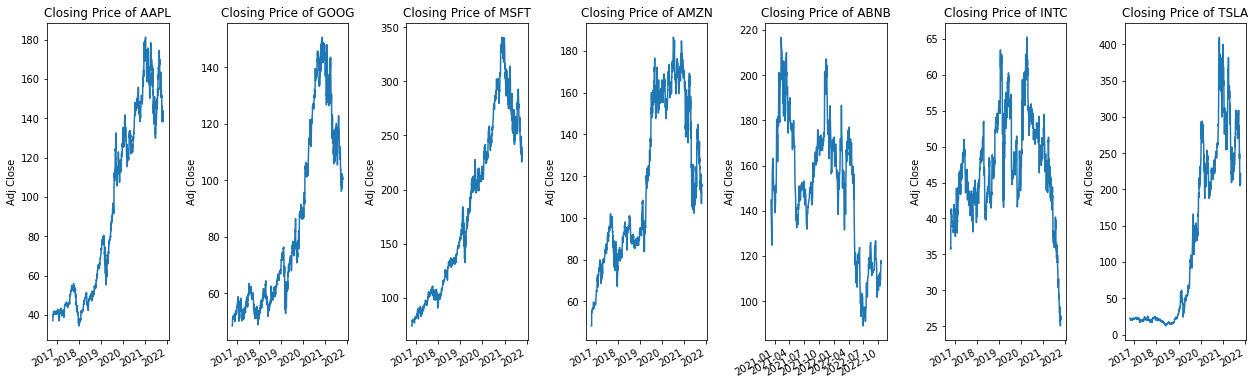

In [181]:
# Let's see a historical view of the closing price


plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 8, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {technicalList[i - 1]}")
    
plt.tight_layout()

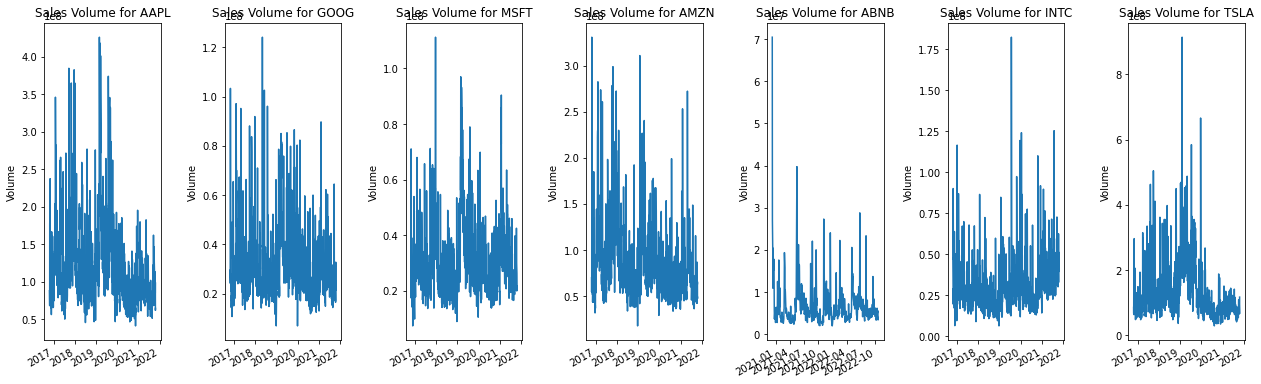

In [182]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 8, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {technicalList[i - 1]}")
    
plt.tight_layout()

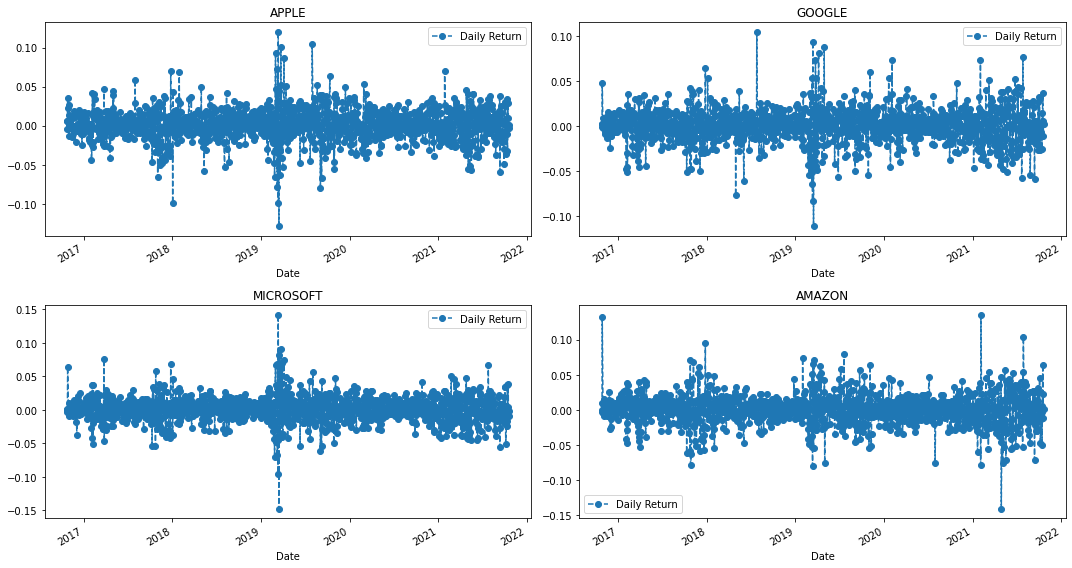

In [86]:

# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

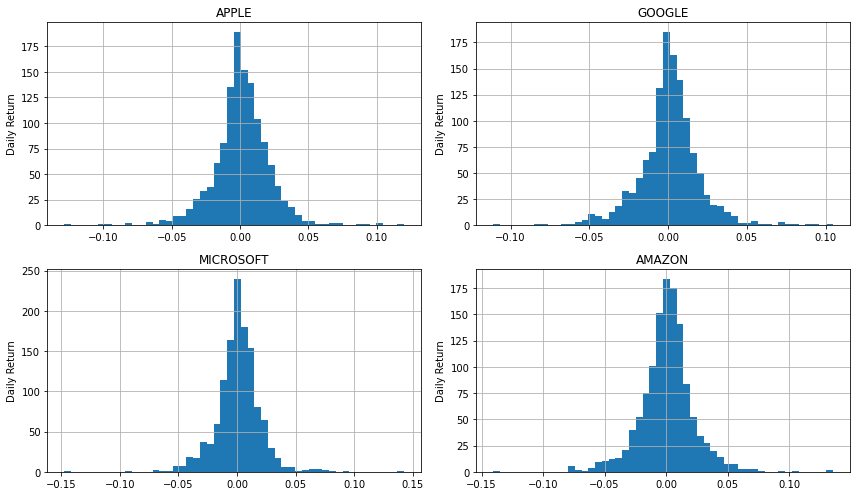

In [87]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

Single stock clasification 

In [184]:
chosen_stock = 'TESLA'

In [185]:
dataFrame_stock = dataFrame.loc[dataFrame['company_name']==chosen_stock,:]

In [186]:
dataFrame_stock.drop(['company_name'],axis = 1,inplace=True)

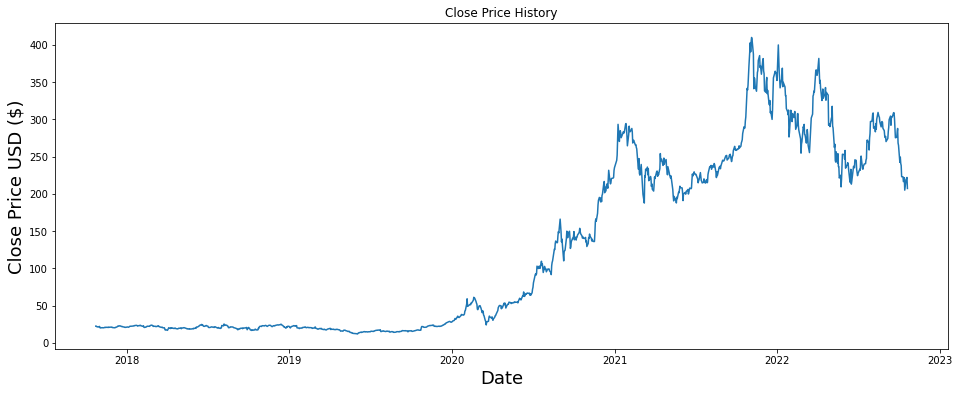

In [187]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(dataFrame_stock['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [188]:
# Create a new dataframe with only the 'Close column 
data = dataFrame_stock.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .92 ))

In [189]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [190]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [191]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1098/1098 [==============================] - 85s 72ms/step - loss: 0.0048


In [192]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
testing_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_testing = []
y_testing = dataset[training_data_len:, :]
for i in range(60, len(testing_data)):
    x_testing.append(testing_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_testing = np.array(x_testing)

# Reshape the data
x_testing = np.reshape(x_testing, (x_testing.shape[0], x_testing.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_testing)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_testing) ** 2)))
rmse

4/4 [==============================] - 2s 54ms/step


18.971092796686605

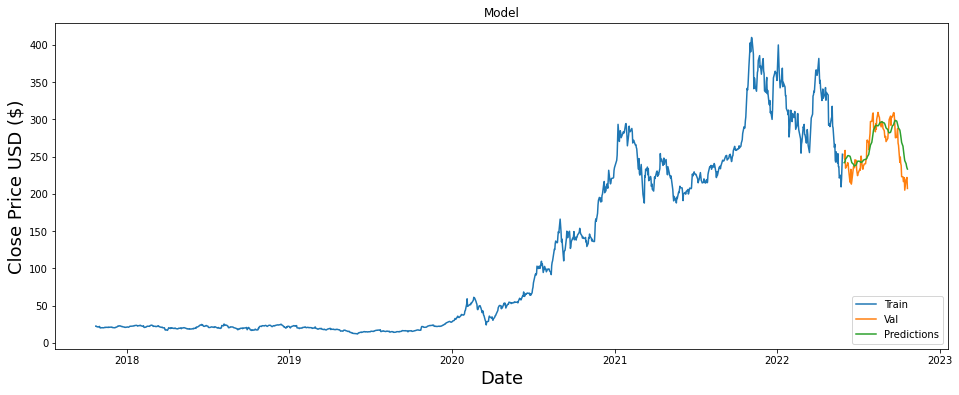

In [193]:
# Plot the data
trained = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(trained['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [194]:
validation

,Close,Predictions
Date,,
2022-05-31 00:00:00-04:00,252.753326,241.823807
2022-06-01 00:00:00-04:00,246.789993,242.467773
2022-06-02 00:00:00-04:00,258.333344,244.195206
2022-06-03 00:00:00-04:00,234.516663,246.803192
2022-06-06 00:00:00-04:00,238.279999,249.017944
...,...,...
2022-10-14 00:00:00-04:00,204.990005,244.623535
2022-10-17 00:00:00-04:00,219.350006,240.607544
2022-10-18 00:00:00-04:00,220.190002,237.289978


In [195]:
from sklearn.metrics import mean_squared_error

real_close = validation.iloc[:,0]
pred_close = validation.iloc[:,1]

# Compute the root-mean-square
rms = np.sqrt(mean_squared_error(real_close, pred_close))
print(rms)


18.971092796686605
